# Setup

## Instructions
1. Download this notebook, and open in it in Jupyer, JupyerLab, VSCode, etc.

In [ ]:
!pip install -U octofitterpy

The first time you import octofitterpy, we will automatically install Julia (via JuliaUp) and compile Octofitter.jl in a self-contained environment. Subsequent imports will be faster.

In [1]:
%cd ..

/Users/thompsonw/Documents/octofitterpy


In [2]:
import octofitterpy as octo

[juliapkg] Locating Julia ^1.10
[juliapkg] Using Julia 1.10.2 at /Users/thompsonw/.julia/juliaup/julia-1.10.2+0.aarch64.apple.darwin14/bin/julia
[juliapkg] Using Julia project at /Users/thompsonw/anaconda3/julia_env
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.add([Pkg.PackageSpec(name="PythonCall", uuid="6099a3de-0909-46bc-b1f4-468b9a2dfc0d"), Pkg.PackageSpec(name="Octofitter", uuid="daf3887e-d01a-44a1-9d7e-98f15c5d69c9"), Pkg.PackageSpec(name="Distributions", uuid="31c24e10-a181-5473-b8eb-7969acd0382f"), Pkg.PackageSpec(name="CairoMakie", uuid="13f3f980-e62b-5c42-98c6-ff1f3baf88f0"), Pkg.PackageSpec(name="PairPlots", uuid="43a3c2be-4208-490b-832a-a21dcd55d7da"), Pkg.PackageSpec(name="Plots", uuid="91a5bcdd-55d7-5caf-9e0b-520d859cae80")])
           julia> Pkg.resolve()
           julia> Pkg.precompile()


   Resolving package versions...
    Updating `~/anaconda3/julia_env/Project.toml`
  [13f3f980] + CairoMakie v0.11.9
  [31c24e10] + Distributions v0.25.107
  [daf3887e] + Octofitter v2.3.1
  [43a3c2be] + PairPlots v2.6.1
  [91a5bcdd] + Plots v1.40.1
  [6099a3de] + PythonCall v0.9.15
    Updating `~/anaconda3/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v0.2.6
  [621f4979] + AbstractFFTs v1.5.0
  [398f06c4] + AbstractLattices v0.3.0
  [80f14c24] + AbstractMCMC v5.2.0
  [1520ce14] + AbstractTrees v0.4.5
  [7d9f7c33] + Accessors v0.1.36
  [79e6a3ab] + Adapt v4.0.2
  [0bf59076] + AdvancedHMC v0.6.1
  [27a7e980] + Animations v0.4.1
  [dce04be8] + ArgCheck v2.3.0
⌅ [ec485272] + ArnoldiMethod v0.1.0
  [4fba245c] + ArrayInterface v7.8.0
  [c61b5328] + AstroTime v0.7.0
  [67c07d97] + Automa v1.0.3
  [13072b0f] + AxisAlgorithms v1.1.0
  [39de3d68] + AxisArrays v0.4.7
  [198e06fe] + BangBang v0.4.1
  [9718e550] + Baselet v0.1.1
  [26cce99e] + BasicInterpolators v0.7.1
  [6e4b80f9] + BenchmarkT

Detected Jupyter notebook. Loading juliacall extension. Set `OCTOFITTERPY_AUTOLOAD_EXTENSIONS=no` to disable.


# Fit Relative Astrometry

We start by defining a likelihood object for our data, in this case relative astrometry of the planet.

In [5]:
astrom_like = octo.PlanetRelAstromLikelihood(
    # MJD
    epoch = [50000,50120,50240,50360,50480,50600,50720,50840],
    # delta RA, milliarcseconds (East is positive)
    ra = [-505.7,-502.5,-498.2,-492.6,-485.9,-478.1,-469.0,-458.8],
    # delta DEC, milliarcseconds (North is positive)
    dec = [-66.9,-37.4,-7.9,21.6,51.1,80.5,109.7,138.6],
    # Uncertainty on RA, milliarcseconds
    σ_ra = [10,10,10,10,10,10,10,10.0],
    # Uncertainty on DEC, milliarcseconds
	σ_dec = [10,10,10,10,10,10,10,10],
    # Corelation between RA and DEC uncertainties
	cor= [0,0,0,0,0,0,0,0.0]
)
astrom_like

PlanetRelAstromLikelihood Table with 6 columns and 8 rows:
     cor  σ_ra  σ_dec  ra      dec    epoch
   ┌───────────────────────────────────────
 1 │ 0.0  10.0  10     -505.7  -66.9  50000
 2 │ 0.0  10.0  10     -502.5  -37.4  50120
 3 │ 0.0  10.0  10     -498.2  -7.9   50240
 4 │ 0.0  10.0  10     -492.6  21.6   50360
 5 │ 0.0  10.0  10     -485.9  51.1   50480
 6 │ 0.0  10.0  10     -478.1  80.5   50600
 7 │ 0.0  10.0  10     -469.0  109.7  50720
 8 │ 0.0  10.0  10     -458.8  138.6  50840

If your dates aren't in MJD format, you might use one of these functions to convert:

**To convert dates:**
*  `octo.mjd("2020-01-01")` -> to MJD
*  `octo.years2mjd("2020.0")` -> to MJD
*  convert back: `octo.mjd2date(50000)` -> `datetime.date(1995, 10, 10)`



You could also define the astrometry using a separation & position angle format:
```python
# You can also use separation (milliarcseconds) and position angle (RADIANS):
astrom_like = octo.PlanetRelAstromLikelihood(
    # MJD
    epoch = [50000,50120],
    # separation from star, milliarcseconds (East is positive)
    sep = [505.7,600.1],
    # position angle, RADIANS (!!) (NOT DEGREES)
    pa = [0.0,0.4,],
    # Uncertainty on sep, milliarcseconds
    σ_sep = [10,10],
    # Uncertainty on pa, RADIANS
	σ_pa = [0.01,0.01],
    # Corelation between PA and SEP uncertainties
    cor= [0,0.2]
)
```

We now define the planet component of our model. We specify a name, an orbital basis, our priors, and list any likelihood objects.

Note! Change the reference epoch provided to `θ_at_epoch_to_tperi` from 50000 to one where your astrometry is defined. This is critical for good performance.

In [4]:
planet_b = octo.Planet(
    name="b",
    basis="Visual{KepOrbit}",
    priors=
    """            
        a ~ LogUniform(0.1, 500)
        e ~ Uniform(0.0, 0.99)
        i ~ Sine()
        ω ~ UniformCircular()
        Ω ~ UniformCircular()
        θ ~ UniformCircular()
        tp = θ_at_epoch_to_tperi(system,b,50000) # use MJD epoch of your data here!!
    """,
    likelihoods=[astrom_like]
)

Now we define our system, containing our planet. We provide it with a name (used to specofy the output file names and plot legends), our priors, a list of lieklihood objects for the system as a whole (eg proper motion anomaly, radial velocity), and a list of companion models.

In [4]:
# The name of your system determines the output file names
sys = octo.System(
    name="HIP100123",
    priors = 
    """
        M ~ truncated(Normal(1.2, 0.1), lower=0)
        plx ~ truncated(Normal(50.0, 0.02), lower=0)
    """,
    likelihoods=[],
    companions=[planet_b]
)

We then compile our model. There are a few options for this function (for example, you can select the autodiff backend), but the defaults are reasonable.

In [5]:
model = octo.LogDensityModel(sys)

We now fit the model. By default this uses a Hamiltonian Monte Carlo sampler with 1000 steps of adaptation (discarded) and 1000 iterations. You can pass eg. `adaptation=5000, iterations=25000` if you would like more points for your plots.

In [13]:
chain = octo.octofit(model)

[ Info: Determining initial positions and metric using pathfinder
[ Info: Sampling, beginning with adaptation phase...
Sampling 100%|███████████████████████████████| Time: 0:00:06
  iterations:                                   2000
  ratio_divergent_transitions:                  0.01
  ratio_divergent_transitions_during_adaption:  0.03
  n_steps:                                      127
  is_accept:                                    true
  acceptance_rate:                              0.8751609825207977
  log_density:                                  -50.070655634064906
  hamiltonian_energy:                           54.065206027415336
  hamiltonian_energy_error:                     -0.05857859572574853
  max_hamiltonian_energy_error:                 0.3105419958132458
  tree_depth:                                   7
  numerical_error:                              false
  step_size:                                    0.016276347960850257
  nom_step_size:                             

Sampling report for chain:
mean_accept                 = 0.9061795447125631
ratio_divergent_transitions = 0.011
mean_tree_depth             = 7.279
max_tree_depth_frac         = 0.0
gradient_evaluations        = 444152


**Long runtimes indiciate an error in your model**

The orbit fitting should take <30 s for this example. If you find it takes much longer on your code, double check the model and priors. Is the epoch you specified for `tperi` the same as your data? 

**Numerical errors indicate a problem with sampling**
If you see a report that numerical errors were encountered during sampling, the results may not be statistically valid. You could re-try sampling, or investigate your model for errors.

We can now display our results

In [14]:
chain

Chains MCMC chain (1000×28×1 Array{Float64, 3}):

Iterations        = 1:1:1000
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 7.79 seconds
Compute duration  = 7.79 seconds
parameters        = M, plx, b_a, b_e, b_i, b_ωy, b_ωx, b_Ωy, b_Ωx, b_θy, b_θx, b_ω, b_Ω, b_θ, b_tp
internals         = n_steps, is_accept, acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, is_adapt, loglike, logpost, tree_depth, numerical_error

Summary Statistics
  parameters         mean         std       mcse    ess_bulk   ess_tail      r ⋯
      Symbol      Float64     Float64    Float64     Float64    Float64   Floa ⋯

           M       1.1895      0.0976     0.0046    460.6517   525.3502    1.0 ⋯
         plx      49.9998      0.0195     0.0006   1042.4646   574.8890    0.9 ⋯
         b_a      12.9485      4.4464     0.5346     82.9477    99.6294    1.0 ⋯
         b_e       0.1881      0.1335  

If you wish to save this summary table to a text file, you can convert it to a string like so:

In [15]:
summary_str = repr(chain)

The chain itself can be saved to a FITS table like so:

In [16]:
octo.savechain("mychain.fits", chain)

## Plotting

Display posterior draws as orbits. These functions generate output images in your folder instead of displaying inline in the notebook. 

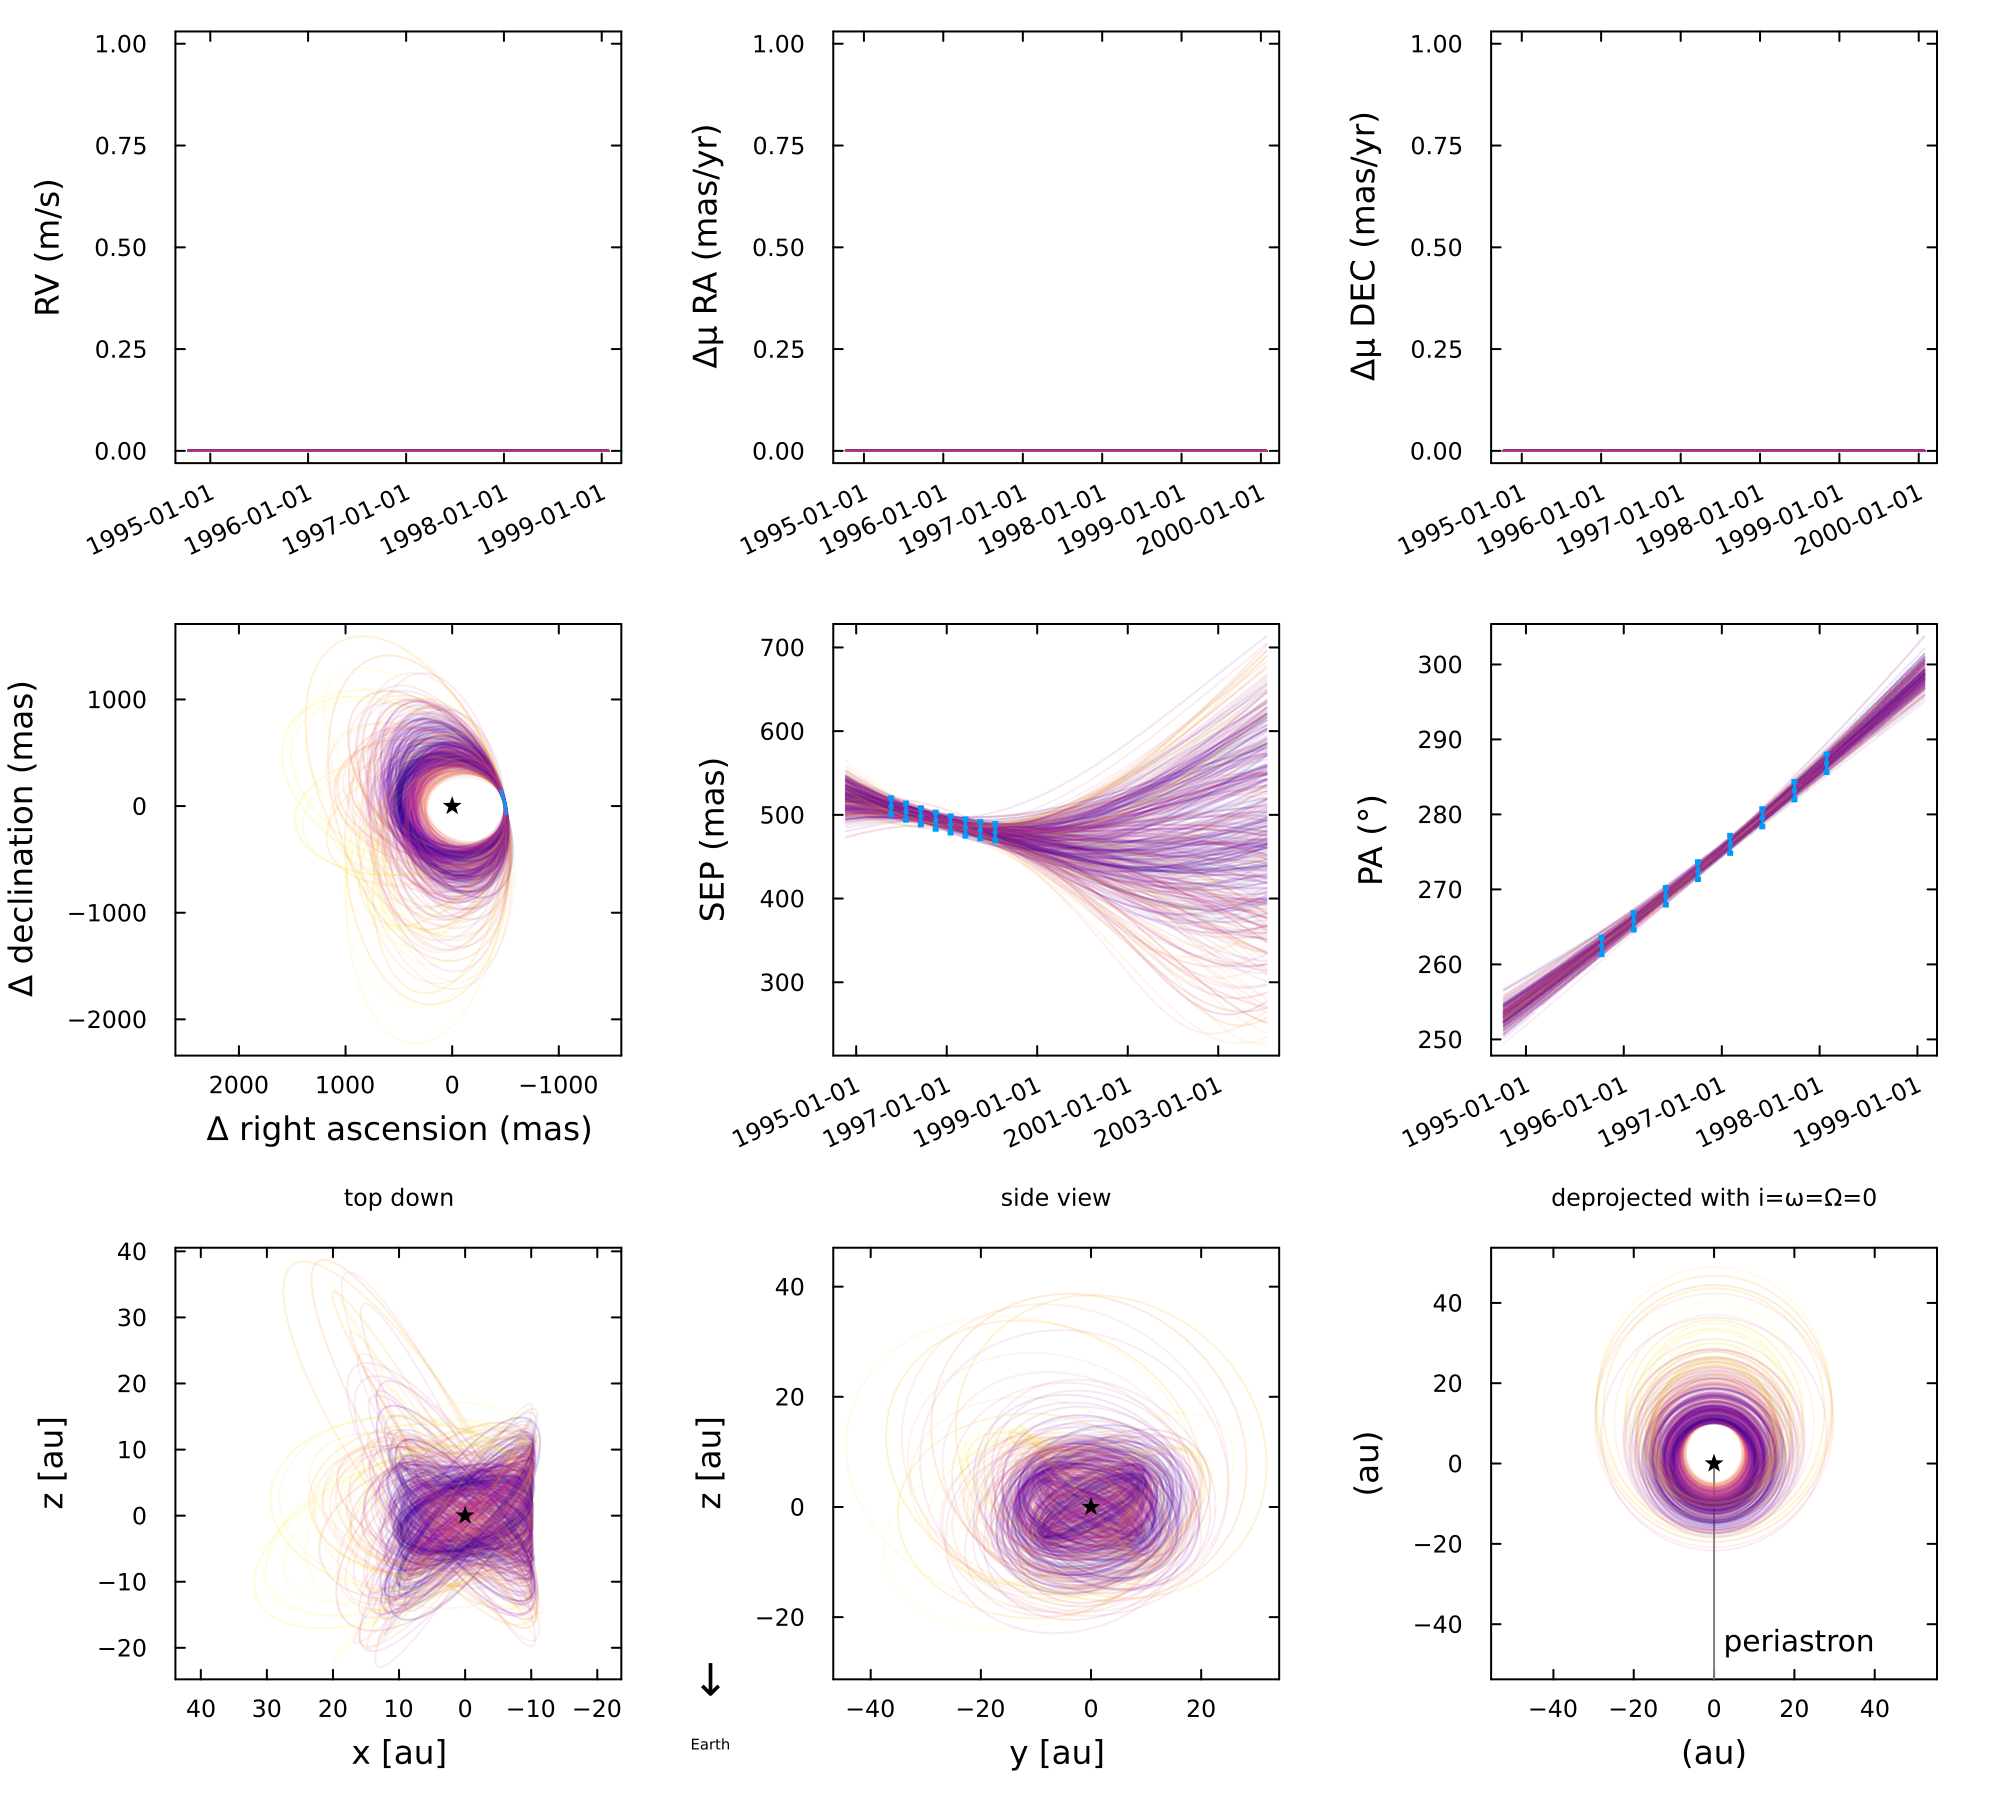

In [17]:
octo.octoplot(model,chain)

Now make a corner plot. Set `small=False` to see all variables.

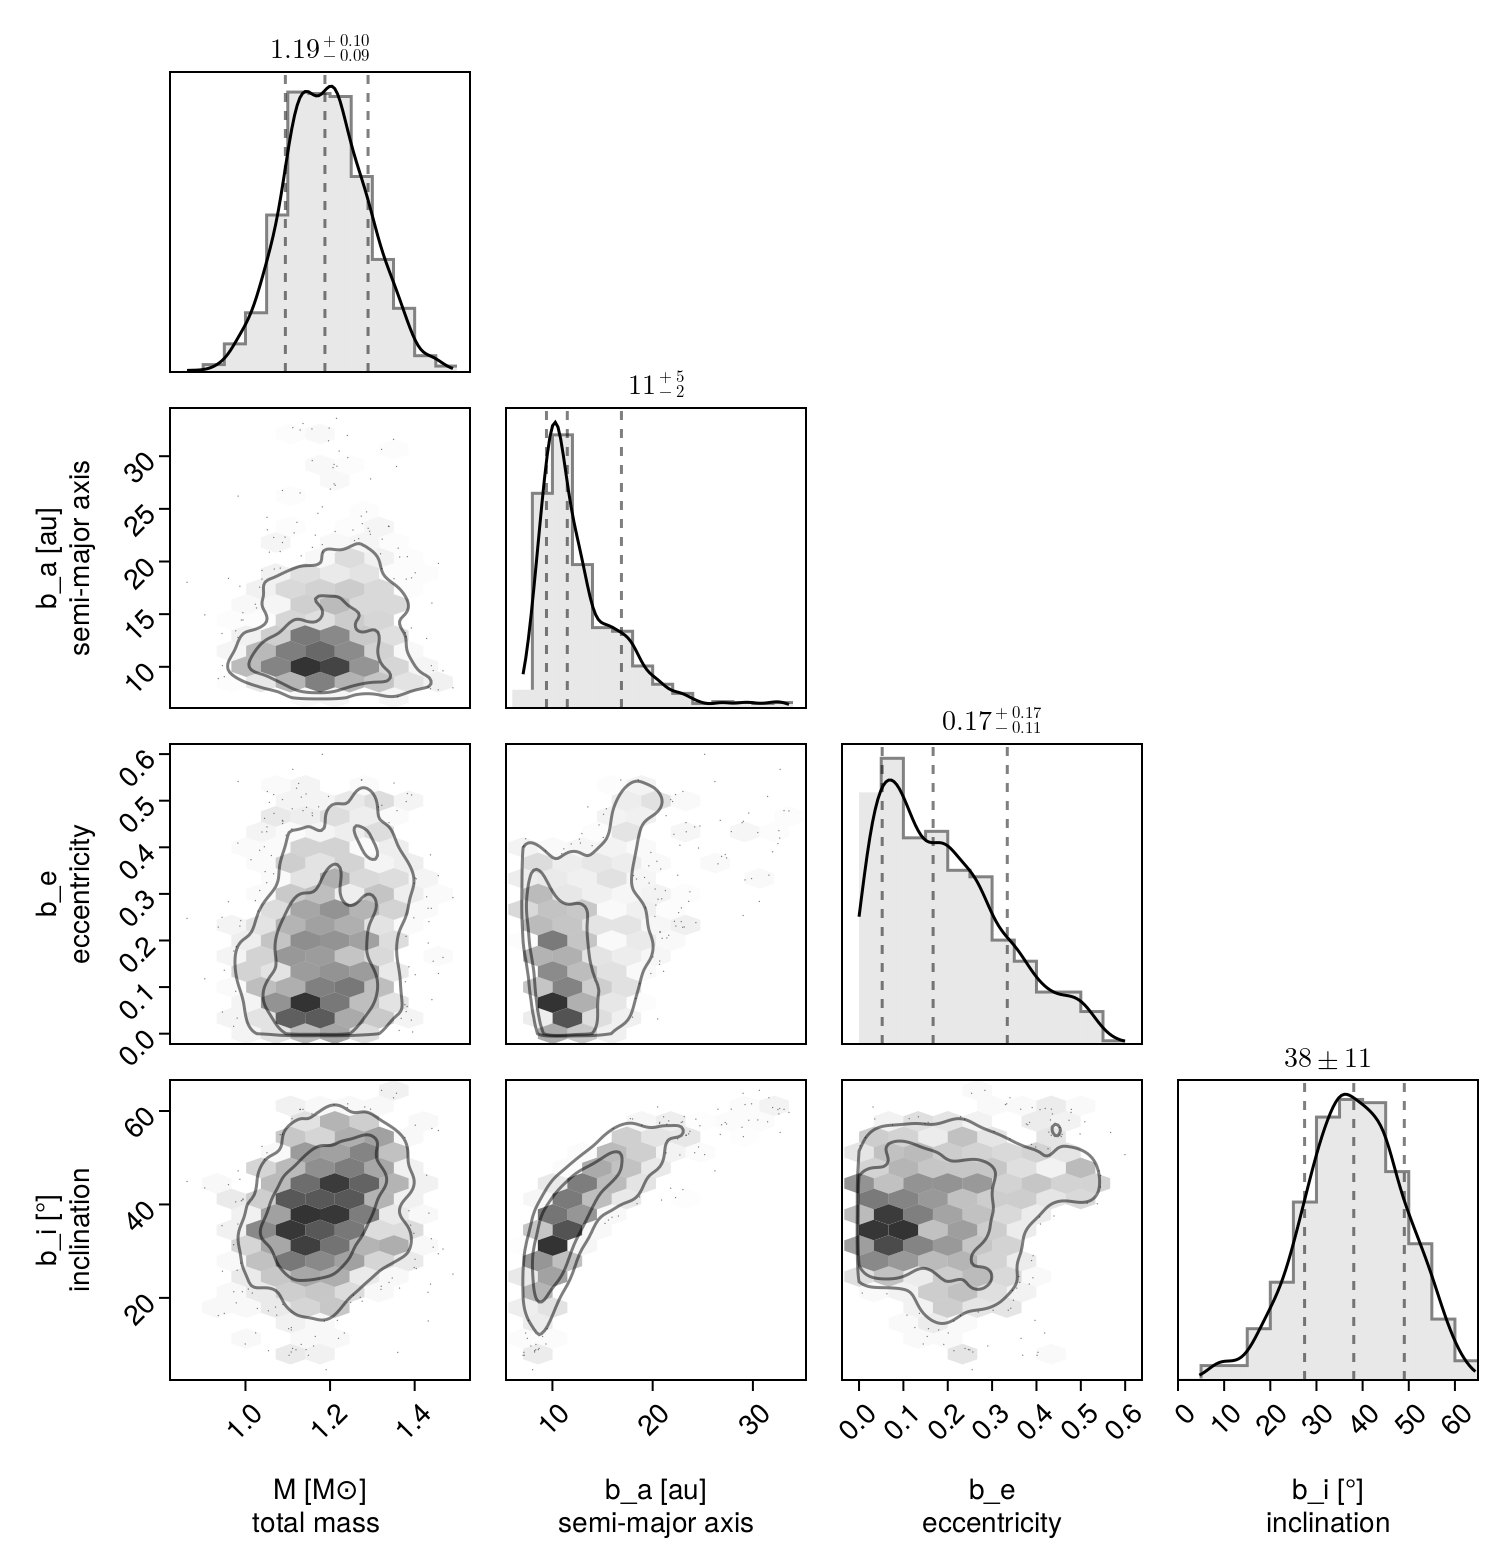

In [18]:
octo.octocorner(model,chain,small=True)

## Fit Relative Astrometry and HGCA

Octofitter.jl supports fitting orbit models to astrometric motion in the form of GAIA-Hipparcos proper motion anomaly (HGCA; [https://arxiv.org/abs/2105.11662](https://arxiv.org/abs/2105.11662)).
These data points are calculated by finding the difference between a long term proper motion of a star between the Hipparcos and GAIA catalogs, and their proper motion calculated within the windows of each catalog. This gives four data points that can constrain the dynamical mass & orbits of planetary companions (assuming we subtract out the net trend).

If your star of interest is in the HGCA, all you need is it's GAIA DR3 ID number. You can find this number by searching for your target on [SIMBAD](http://simbad.cds.unistra.fr).

For this tutorial, we will examine the star and companion [HD 91312 A & B](https://arxiv.org/abs/2109.12124) discovered by SCExAO. We will use their published astrometry and proper motion anomaly extracted from the HGCA.

The first step is to find the GAIA source ID for your object. For HD 91312, SIMBAD tells us the GAIA DR3 ID is `756291174721509376`.

You can add a Hipparcos-GAIA proper motion anomally likelihood function by following these examples. You will need to add a `mass` variable to the planet, and `pmra` and `pmdec` (mas/yr) parameters to the system.

In [19]:
astrom_like = octo.PlanetRelAstromLikelihood(
    # MJD
    epoch = [57737.0,57824.0,57825.0,58157.0,58450.0,58467.0],
    # delta RA, milliarcseconds (East is positive)
    ra = [133.0, 126.0, 127.0, 83.0, 58.0, 56.0],
    # delta DEC, milliarcseconds (North is positive)
    dec = [-174.0, -176.0, -172.0, -133.0, -122.0, -104.0],
    # Uncertainty on RA, milliarcseconds
    σ_ra = [7.0, 4.0, 4.0, 10.0, 10.0, 8.0],
    # Uncertainty on DEC, milliarcseconds
	σ_dec = [7.0, 4.0, 4.0, 10.0, 20.0, 8.0],
    # Corelation between RA and DEC uncertainties
	cor= [0,0,0,0,0,0]
)
    

planet_b = octo.Planet(
    name="b",
    basis="Visual{KepOrbit}",
    priors=
    """            
        a ~ LogUniform(0.1, 500)
        e ~ Uniform(0.0, 0.99)
        i ~ Sine()
        ω ~ UniformCircular()
        Ω ~ UniformCircular()
        θ ~ UniformCircular()
        tp = θ_at_epoch_to_tperi(system,b,50000) # use MJD epoch of your data here!!
        mass ~ LogUniform(1, 1000)
    """,
    likelihoods=[astrom_like]
)

hgca_like = octo.HGCALikelihood(gaia_id=756291174721509376)
# The name of your system determines the output file names
sys = octo.System(
    name="HIP100123_with_pma",
    priors=
    """
        M ~ truncated(Normal(1.6, 0.1), lower=0)
        plx ~ gaia_plx(gaia_id=756291174721509376)
        pmra ~ Normal(0,1000)
        pmdec ~ Normal(0,1000)
    """,
    likelihoods=[hgca_like],
    companions=[planet_b]
)
model = octo.LogDensityModel(sys)

In [ ]:
chain = octo.octofit(model)

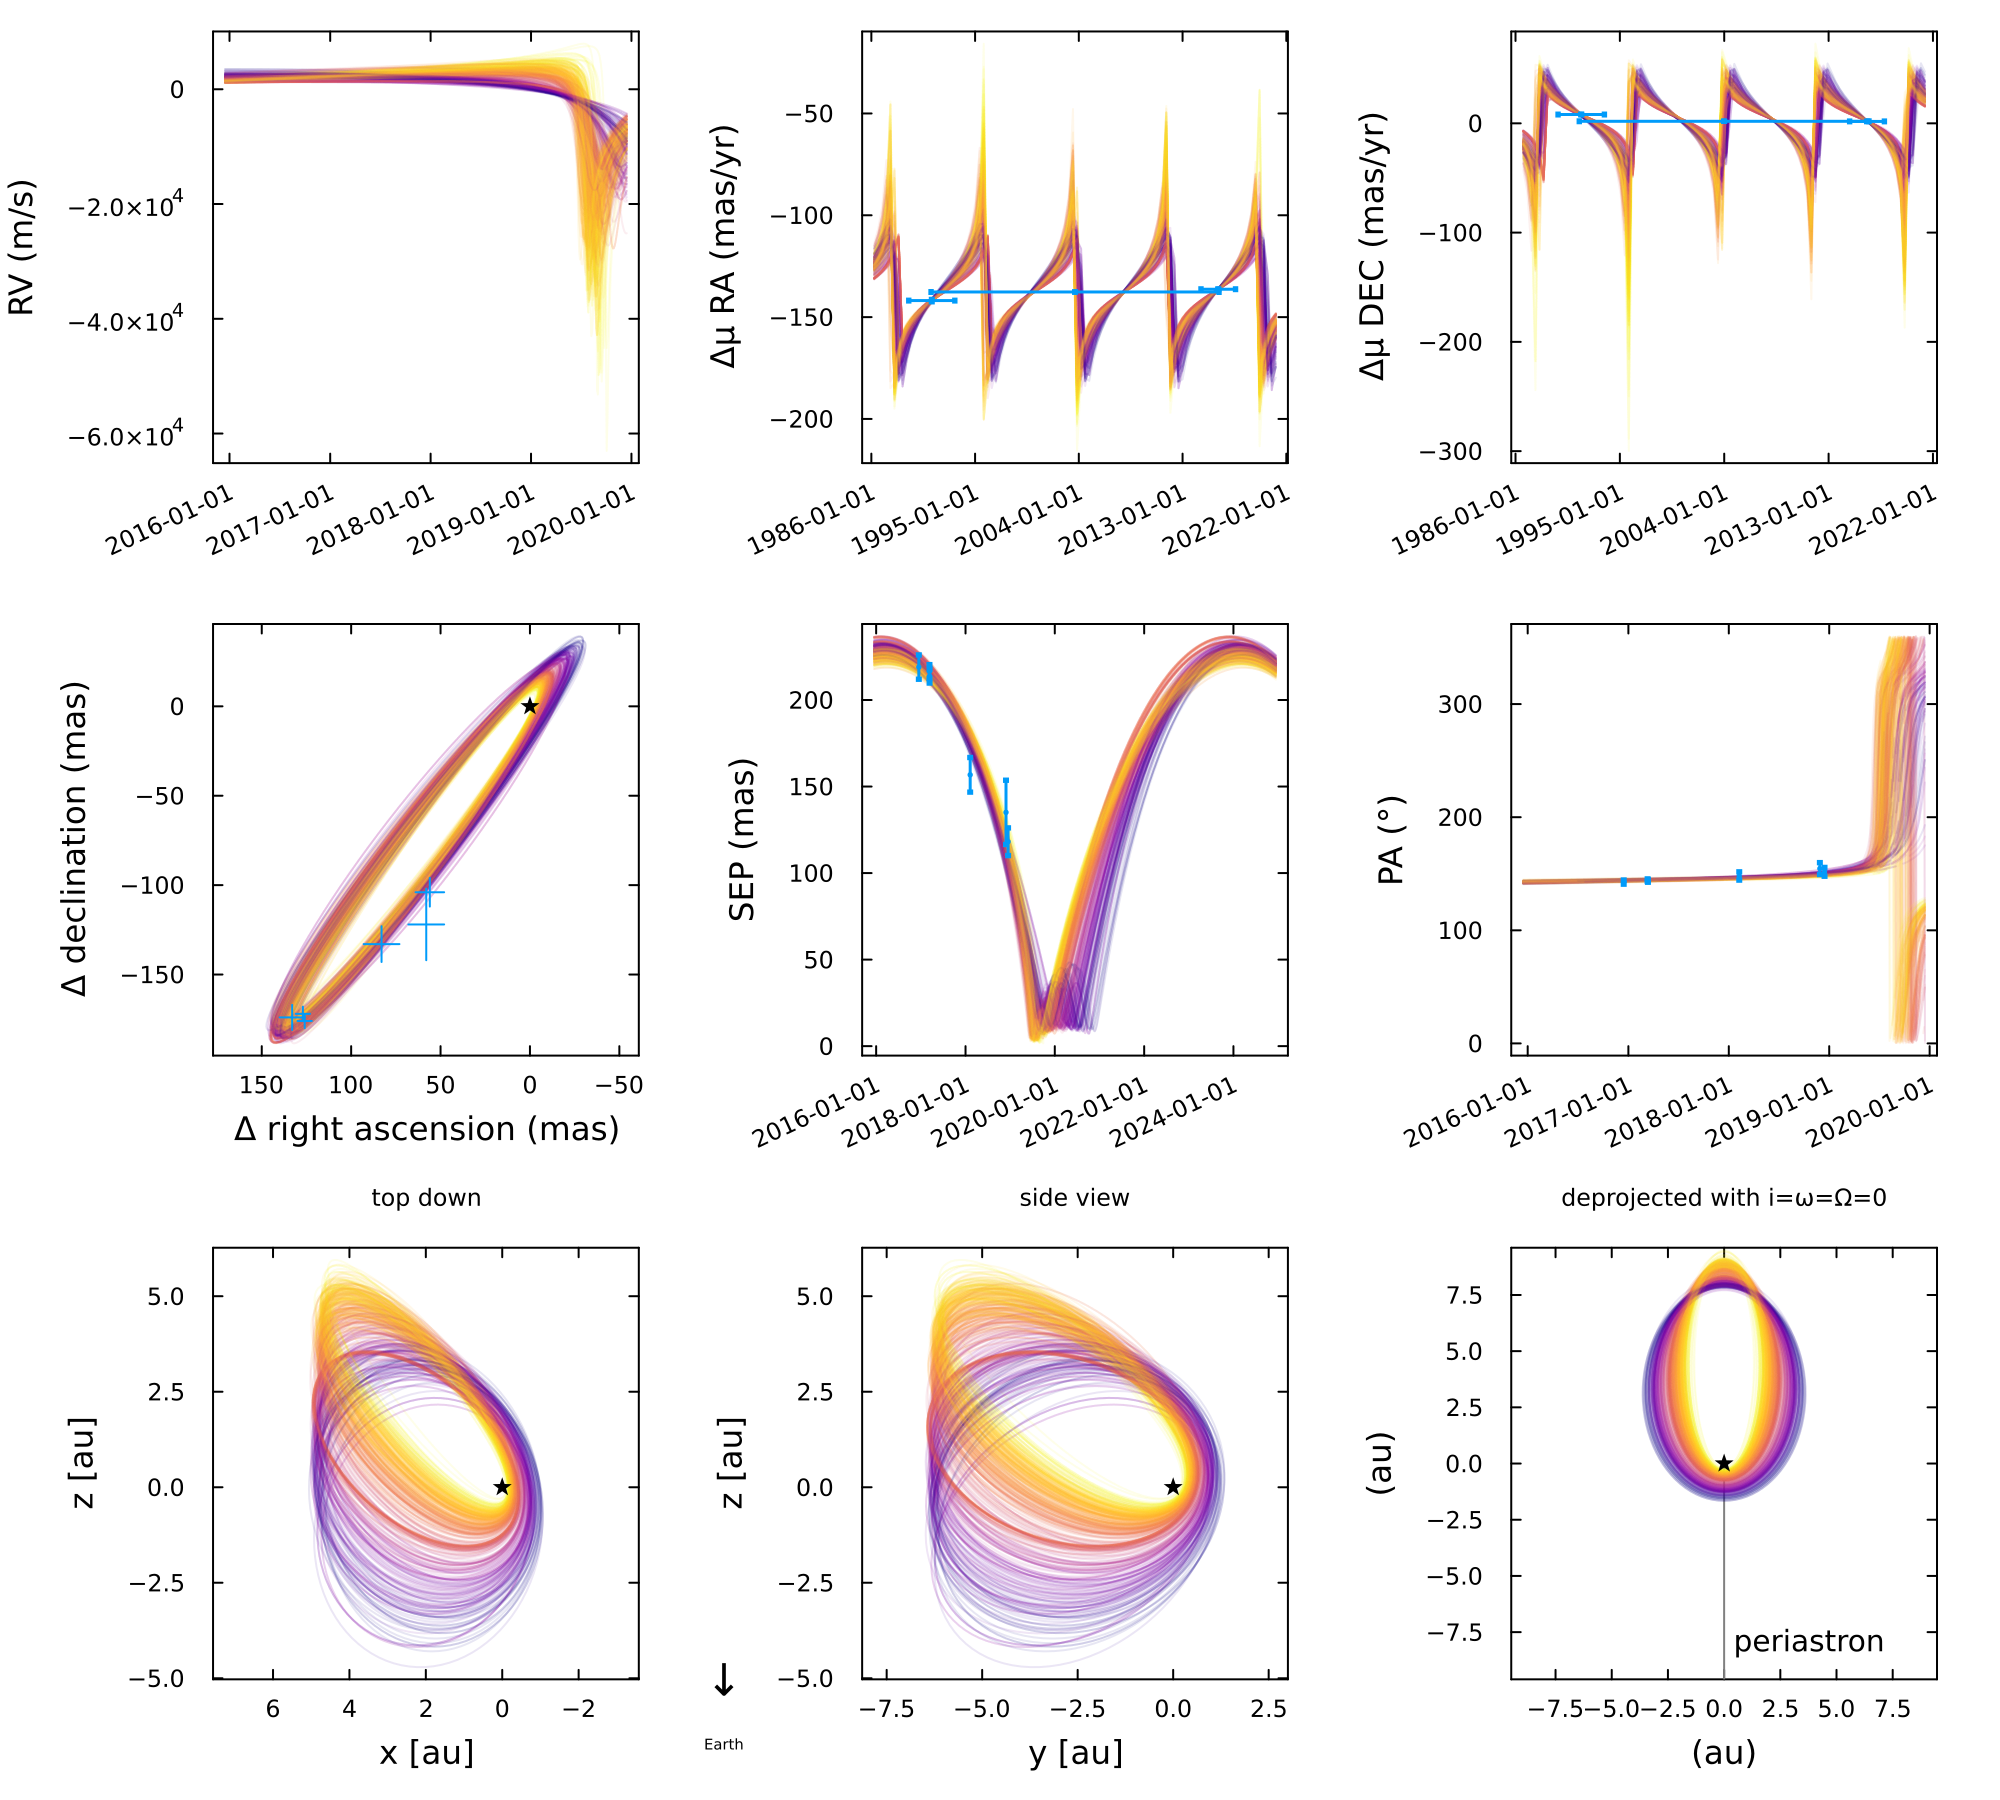

In [22]:
octo.octoplot(model,chain)

The above will work well if you have decent orbital coverage. If you don't, an HGCA posterior is likely highly multi-modal. 

To sample from a multi-modal, posterior, try using Pigeons non-reversible parallel tempered sampling. This requires installing another package:

In [ ]:
octo.jl.Pkg.add("Pigeons")

In [23]:
chain, pt = octo.octofit_pigeons(model, n_rounds=10)

─────────────────────────────────────────────────────────────────────────────────────────────────────────────
  scans     restarts      Λ        time(s)    allc(B)  log(Z₁/Z₀)   min(α)     mean(α)    min(αₑ)   mean(αₑ) 
────────── ────────── ────────── ────────── ────────── ────────── ────────── ────────── ────────── ──────────
        2          0          3      0.033   6.13e+05  -2.68e+08          0      0.571      0.988      0.998 
        4          0       2.62     0.0625   7.17e+05  -1.35e+08          0      0.626      0.994      0.998 
        8          0       2.58     0.0988   4.27e+05  -1.25e+07          0      0.631          1          1 
       16          0       4.71      0.184   8.18e+05  -2.37e+06          0      0.328          1          1 
       32          0       5.87      0.372   1.59e+06  -1.14e+06          0      0.161          1          1 
       64          0       6.18      0.824   3.17e+06  -4.86e+05          0      0.118          1          1 
      128 

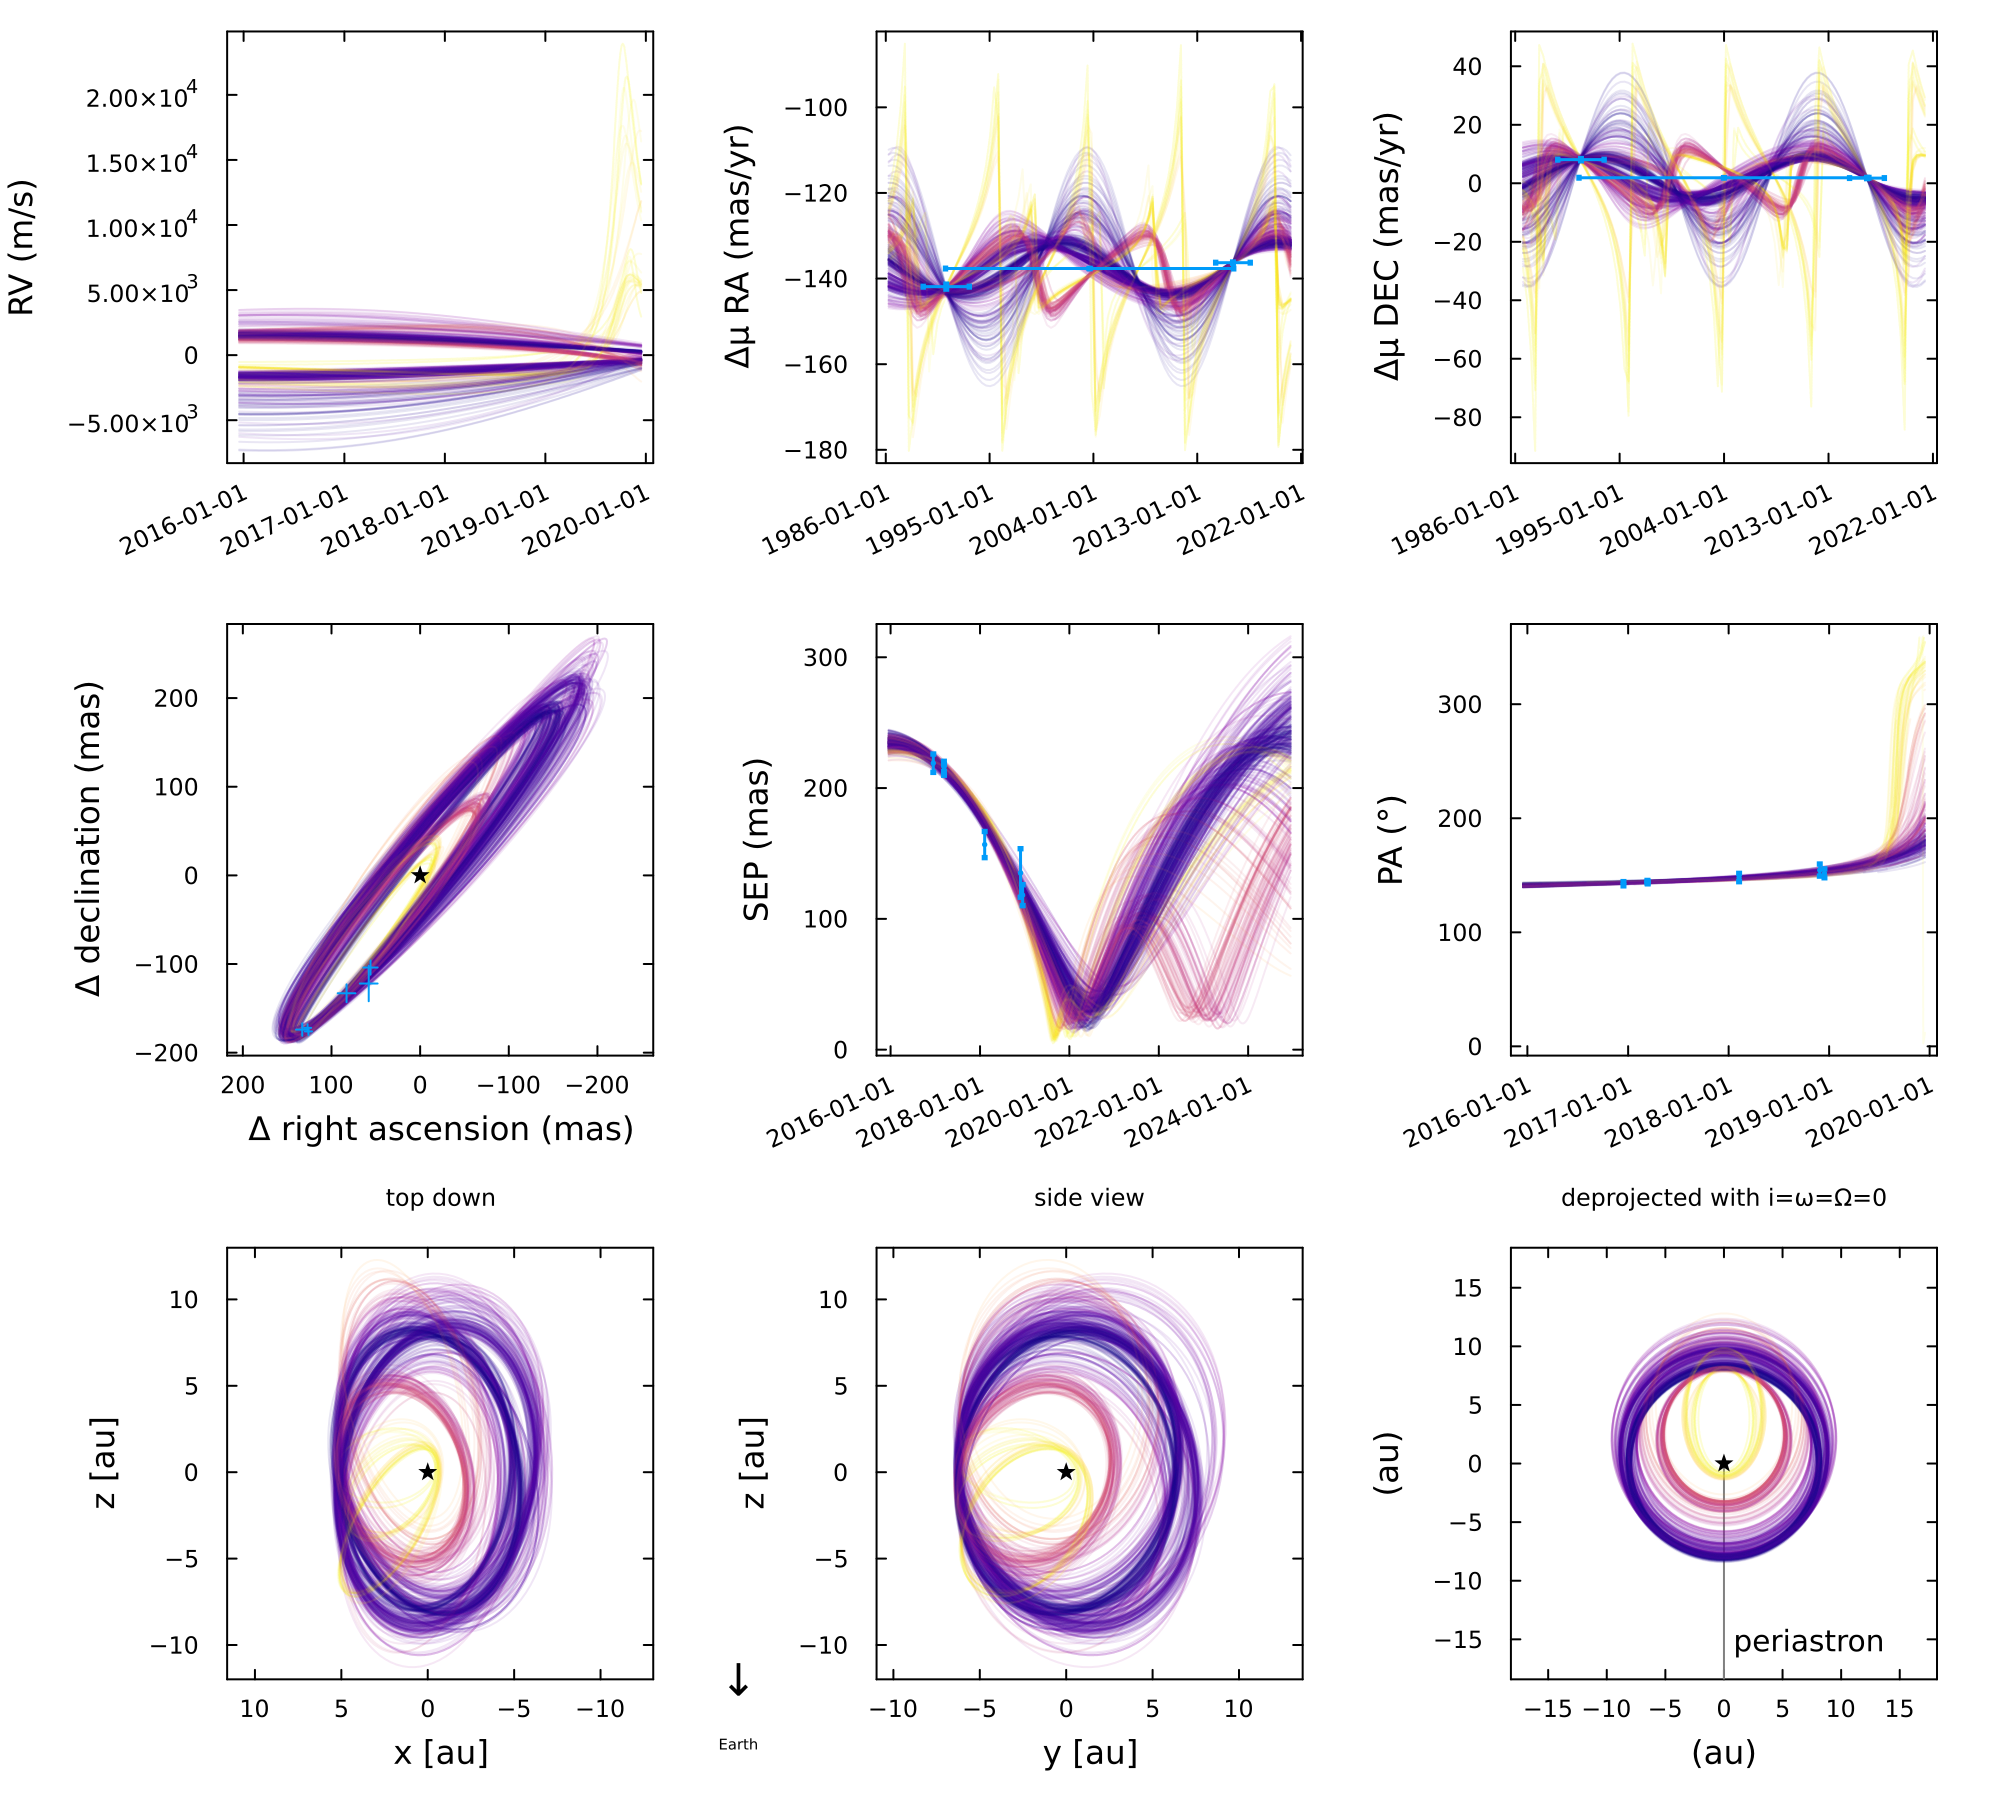

In [25]:
octo.octoplot(model,chain)

Much better!